[K-means](http://scikit-learn.org/stable/modules/clustering.html#clustering)

1. The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares. The lower the value of inertia, the higher the quality
2. This algorithm requires the number of clusters to be specified. 
3. It scales well to large number of samples and has been used across a large range of application areas in many different
fields.
4. K-means is often referred to as Lloyd’s algorithm

**How it works:**

1. Chooose random number of centroids
2. Assign each sample to it's nearest centroid. Distance metric: Euclidean
3. Calculate new centroids by taking the mean value of all of the samples assigned to each previous centroid.
4. Repeat step 2 and 3 until the centroids do not move significantly.


- k-means++ initialization scheme: This initializes the centroids to be (generally) distant from each other, leading to provably better results than random initialization.
- A parameter can be given to allow K-means to be run in parallel, called **n_jobs**. Giving this parameter a positive value uses that many processors (default: 1). A value of -1 uses all available processors, with -2 using one less, and so on. Parallelization generally speeds up computation at the cost of memory (in this case, multiple copies of centroids need to be stored, one for each job).

**Evaluation: **

1. The **Silhouette Coefficient** is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample.  
2. The Silhouette Coefficient for a sample is **(b - a) / max(a,b)**. ``b`` is the distance between a sample and the nearest cluster that the sample is not a part of.
1. The best value is 1 and the worst value is -1. 
2. Values near 0 indicate overlapping clusters. 
3. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

**Applications:**

* Customer / Market Segmentation
* Natural Language Processing (NLP)
* Computer Vision
* Stock markets

In [2]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data=pd.read_csv('Iris.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [5]:
data.head(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa


In [6]:
data.Species.value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [7]:
data['Species_num']=data['Species'].map({'Iris-setosa':0,'Iris-versicolor':1, 'Iris-virginica':2})

In [8]:
data.iloc[[49,99,149]]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_num
49,50,5.0,3.3,1.4,0.2,Iris-setosa,0
99,100,5.7,2.8,4.1,1.3,Iris-versicolor,1
149,150,5.9,3.0,5.1,1.8,Iris-virginica,2


In [26]:
X=data.iloc[:,3:5]
y=data.iloc[:,6] # It's unsupervised learning, hence target variable in not required. But just for alter comparison reference
#we will keep it

In [10]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_std=ss.fit_transform(X)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_std,y,test_size=.3,random_state=2018)

In [12]:
from sklearn.cluster import KMeans
km1=KMeans()
km1.fit(X_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [13]:
km1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 4, 4, 4, 2, 4, 2, 4, 5, 2, 2, 5, 2, 5, 4, 5, 2,
       4, 5, 4, 5, 6, 2, 4, 2, 2, 2, 4, 6, 4, 5, 5, 5, 2, 4, 4, 4, 4, 2,
       2, 2, 2, 4, 2, 5, 2, 2, 2, 2, 5, 2, 3, 6, 3, 1, 3, 7, 4, 1, 1, 3,
       6, 6, 3, 6, 3, 3, 1, 7, 7, 4, 3, 6, 7, 6, 3, 1, 6, 6, 3, 1, 1, 7,
       3, 4, 1, 3, 3, 1, 6, 3, 3, 3, 6, 3, 3, 3, 6, 6, 3, 6])

In [14]:
km1.cluster_centers_

array([[-1.30487835, -1.25512862],
       [ 1.16081857,  0.71755025],
       [ 0.26721465,  0.13322594],
       [ 1.05561702,  1.4282347 ],
       [ 0.53529583,  0.40309151],
       [-0.08505731, -0.18948044],
       [ 0.70589294,  0.8870043 ],
       [ 1.64986363,  1.2113043 ]])

In [15]:
data['Cluster']=km1.labels_

In [16]:
data.iloc[[49,99,149]]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_num,Cluster
49,50,5.0,3.3,1.4,0.2,Iris-setosa,0,0
99,100,5.7,2.8,4.1,1.3,Iris-versicolor,1,2
149,150,5.9,3.0,5.1,1.8,Iris-virginica,2,6


In [17]:
from sklearn.metrics import silhouette_score
silhouette_score(X_std,km1.labels_)

0.5880405813047173

In [18]:
# Finding number of cluster using elbow method

In [19]:
wcss=[] # wcss: within cluster sum squared
for i in range(1,11):
    km2=KMeans(n_clusters=i)
    km2.fit(X_std)
    wcss.append(km2.inertia_)

Text(0,0.5,'WCSS')

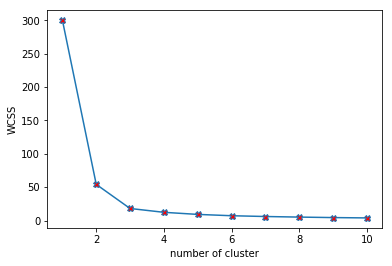

In [20]:
plt.plot(range(1,11), wcss, marker='X', markerfacecolor='r')
plt.xlabel('number of cluster')
plt.ylabel('WCSS')

In [21]:
km3=KMeans(n_clusters=3, random_state=2018)
km3.fit(X_std)
silhouette_score(X_std, km3.labels_)

0.6736179401159209

In [22]:
label=km3.labels_

Text(0.5,1,'Clustering IRIS dataset')

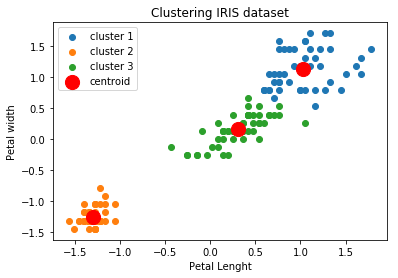

In [23]:
plt.scatter(X_std[label==0,0],X_std[label==0,1], label='cluster 1')
plt.scatter(X_std[label==1,0],X_std[label==1,1], label='cluster 2')
plt.scatter(X_std[label==2,0],X_std[label==2,1], label='cluster 3')
plt.scatter(km3.cluster_centers_[:,0],km3.cluster_centers_[:,1], label='centroid', c='r', s=200)
plt.legend()
plt.xlabel('Petal Lenght')
plt.ylabel('Petal width')
plt.title('Clustering IRIS dataset')

The **MiniBatchKMeans** is a variant of the KMeans algorithm which uses mini-batches to reduce the computation time, while still attempting to optimise the same objective function. 

Mini-batches are subsets of the input data, randomly sampled in each training iteration.<br>
These mini-batches drastically reduce the amount of computation required to converge to a local solution. <br>
In contrast to other algorithms that reduce the convergence time of k-means, mini-batch k-means produces results that are generally only slightly worse than the standard algorithm.<br>

MiniBatchKMeans converges faster than KMeans, but the quality of the results is reduced. In practice this difference in quality can be quite small.

In [24]:
from sklearn.cluster import MiniBatchKMeans
mkm=MiniBatchKMeans(n_clusters=3, batch_size=50, random_state=2018)
mkm.fit(X_std)
silhouette_score(X_std,mkm.labels_)
label_mkm=mkm.labels_

Text(0.5,1,'Clustering IRIS dataset')

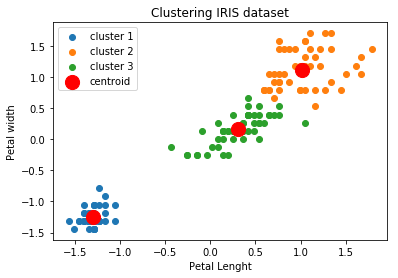

In [25]:
plt.scatter(X_std[label_mkm==0,0],X_std[label_mkm==0,1], label='cluster 1')
plt.scatter(X_std[label_mkm==1,0],X_std[label_mkm==1,1], label='cluster 2')
plt.scatter(X_std[label_mkm==2,0],X_std[label_mkm==2,1], label='cluster 3')
plt.scatter(mkm.cluster_centers_[:,0],mkm.cluster_centers_[:,1], label='centroid', c='r',s=200)
plt.legend()
plt.xlabel('Petal Lenght')
plt.ylabel('Petal width')
plt.title('Clustering IRIS dataset')